# Twitchly Quick Start Guide


## Set Up
To start off with understanding Twitchly, we will first dive into the [Twith API](https://dev.twitch.tv/docs/api/).

We will learn about using your `clientID` to make calls to the Twitch API!

First, follow the quick set up guide on the link above to register your application.

For the sake of this demo
we can use the following values when registering:
- Name = APIDemo
- OAuth Redirect URL = http://localhost:5000/
- Category = Analytics Tool

Once you have created your application, you can click `manage` to find your `clientID` and `clientSecret`.

Next, we will use a wrapper python library called [python-twitch-client](https://python-twitch-client.readthedocs.io/en/latest/index.html).
That will tell you how to install the library as well as provide some very useful documentation.
For now, we will run through an example where we use the popular streamer [Ninja](https://en.wikipedia.org/wiki/Ninja_(streamer)
and get his user data to find out who he is following and who those followed channels are following.

In [55]:
import matplotlib.pyplot as plt

In [2]:
from twitch import TwitchClient 
import pandas as pd



# Let's create the client by passing in your specific client id.
client = TwitchClient(client_id = "6lacju84o3qpgb8fx62bpyza58112z")

# Most of the API is reliant on user-ids so this useful query can provide us the list of user-ids
# for the given usernames that we are all familiar with.
queried_users = client.users.translate_usernames_to_ids(['Ninja'])

# Now that we have the list of users, let's extract Ninja from the list.
user = queried_users[0]

# The user data is full of greabt information but for now, let's just verify that we have the username and id.
print(user.display_name, user.id)

Ninja 19571641


In [11]:
user

{'display_name': 'Ninja',
 'id': '19571641',
 'name': 'ninja',
 'type': 'user',
 'bio': 'Professional Battle Royale player. Follow my twitter @Ninja and for more content subscribe to my Youtube.com/Ninja',
 'created_at': datetime.datetime(2011, 1, 16, 4, 31, 20, 24666),
 'updated_at': datetime.datetime(2018, 9, 26, 15, 5, 36, 299709),
 'logo': 'https://static-cdn.jtvnw.net/jtv_user_pictures/cef31105-8a6e-4211-a74b-2f0bbd9791fb-profile_image-300x300.png'}

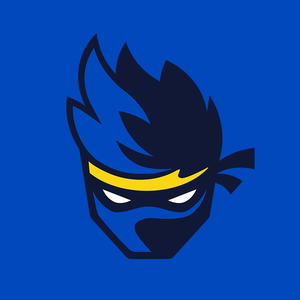

In [10]:
import IPython.display
IPython.display.Image(user.logo)

In [48]:
def get_all_follows(user_id):
    """Return a list of all channels a user follows"""
    channels = []
    
    # We want to avoid adding dupliciate users, which the API has retrieved in the past
    added_channel_names = set()
    offset = 0
    
    followed_channels = client.users.get_follows(user.id, limit=100)
    while len(followed_channels) > 0:
        for followed_channel in followed_channels:
            offset += 1
            channel = followed_channel.channel
            
            if channel.display_name not in added_channel_names:
                channels.append(followed_channel.channel)
                added_channel_names.add(channel.display_name)
    
        followed_channels = client.users.get_follows(user.id, limit=100, offset=offset)
        print(offset, end=' ')
    print()
    return channels

channels = get_all_follows(user.id)

100 193 220 228 232 233 234 235 236 237 238 239 240 241 242 243 


In [53]:
ninja_follows = pd.DataFrame.from_records(channels).sort_values(by=['display_name'])
ninja_follows

,broadcaster_language,broadcaster_software,broadcaster_type,created_at,description,display_name,followers,game,id,language,...,partner,privacy_options_enabled,private_video,profile_banner,profile_banner_background_color,status,updated_at,url,video_banner,views
53,en,unknown_rtmp,partner,2014-07-17 02:13:59,Streaming when I can on the PS4!Maybe will do ...,6Foot4Honda,75727,Fortnite,66520630,en,...,True,False,False,None,None,30 Bomb today -- 100%,2018-09-26 02:24:42,https://www.twitch.tv/6foot4honda,https://static-cdn.jtvnw.net/jtv_user_pictures...,465773
162,en,unknown_rtmp,partner,2014-05-26 00:37:27,@ANGRYPUG,ANGRYPUG,270676,Dead by Daylight,63164470,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,Rank ZERO Survivor HERO,2018-09-26 16:53:08,https://www.twitch.tv/angrypug,https://static-cdn.jtvnw.net/jtv_user_pictures...,15348099
198,en,unknown_rtmp,partner,2013-07-30 07:10:55,"Welcome! My name is Aaron Connor Elam (ACE), a...",AceTV,34300,Halo 5: Guardians,46834271,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,"Short stream before LONDON, SUBTEMBER | ACE FA...",2018-09-26 02:00:14,https://www.twitch.tv/acetv,https://static-cdn.jtvnw.net/jtv_user_pictures...,550145
94,fr,unknown_rtmp,partner,2016-03-11 02:50:05,French Canadian & Battle Royale Competitive pl...,AchilleFPS,15890,Fortnite,118385536,fr,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,1000 SUBS ACHIEVED!! | +1100 Wins 🎯 | @Achille...,2018-09-26 16:02:16,https://www.twitch.tv/achillefps,https://static-cdn.jtvnw.net/jtv_user_pictures...,362474
90,en,unknown_rtmp,partner,2011-04-08 03:58:07,"~ For Stream hours and announcements, check at...",Anthony_Kongphan,402007,PLAYERUNKNOWN'S BATTLEGROUNDS,21588571,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,#3b3b3b,✔️I AM BAAAACK !! - St. Jude $100k Charity Day...,2018-09-26 16:53:37,https://www.twitch.tv/anthony_kongphan,https://static-cdn.jtvnw.net/jtv_user_pictures...,17406836
182,en,unknown_rtmp,partner,2011-04-12 09:47:09,,Aphromoo,714832,League of Legends,21673391,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,duo Rikara we D1 (NO ALERTS),2018-09-26 16:55:22,https://www.twitch.tv/aphromoo,https://static-cdn.jtvnw.net/jtv_user_pictures...,67966031
128,en,unknown_rtmp,0cpm,2011-06-07 05:33:16,Game Designer on H1Z1 King of the Kill - @arcl...,Arclegger,7154,Music,22828020,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,Music time,2018-09-26 08:05:18,https://www.twitch.tv/arclegger,None,101816
142,en,unknown_rtmp,partner,2011-07-13 06:58:02,27. Professional H1Z1 player for Cloud9.,Aydren,116949,H1Z1,23425178,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,"The Long Ranger stackin W's [2,701 wins] - Twi...",2018-09-26 16:26:11,https://www.twitch.tv/aydren,https://static-cdn.jtvnw.net/jtv_user_pictures...,8868194
4,en,unknown_rtmp,partner,2012-05-11 22:56:04,"Hi, I'm Marcel, but you can call me BasicallyI...",BasicallyIDoWrk,255956,Fortnite,30446023,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,I'm really bad.,2018-09-26 16:54:03,https://www.twitch.tv/basicallyidowrk,https://static-cdn.jtvnw.net/jtv_user_pictures...,991902
115,en,unknown_rtmp,partner,2015-08-24 14:46:27,Beloved son. Husband. Father. Bearded. Catholi...,BeardedBlevins,27925,Fortnite,100462683,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,LIONS WIN LEGGO,2018-09-26 06:41:46,https://www.twitch.tv/beardedblevins,https://static-cdn.jtvnw.net/jtv_user_pictures...,306457


pandas.core.series.Series

In [73]:
# Increase standard plot size
plt.rcParams['figure.figsize'] = (14, 9)
%matplotlib inline

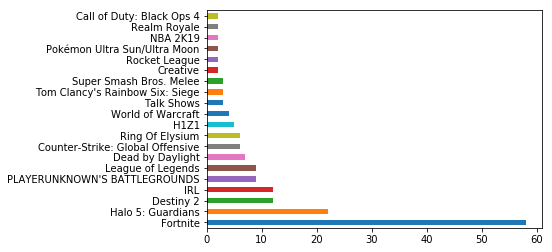

In [78]:
ninja_follows['game'].value_counts()[:20].plot(kind='barh')

In [4]:
# Let's now query for the channels that ninja follows.
# For this example, let's just grab 5 channels.
# Check out the documentation to find out some other functionalities of this function.
followed_channels = client.users.get_follows(user.id, limit = 5)

# We filter out the result a little and add them into a list.
channels = []
for channel in followed_channels:
    channels.append(channel.channel)

# For the fun of it, let's throw these results into a Pandas Dataframe.
pd.DataFrame.from_records(channels)

,broadcaster_language,broadcaster_software,broadcaster_type,created_at,description,display_name,followers,game,id,language,...,partner,privacy_options_enabled,private_video,profile_banner,profile_banner_background_color,status,updated_at,url,video_banner,views
0,en,unknown_rtmp,partner,2016-07-04 00:22:25,Baseballer and Gamer and occasional DJ. @Trevm...,iamtrevormay,47895,Fortnite,128479231,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,New !youtube! !subgoal @IamTrevormay on Twitte...,2018-09-26 16:02:01,https://www.twitch.tv/iamtrevormay,https://static-cdn.jtvnw.net/jtv_user_pictures...,429941
1,en,unknown_rtmp,partner,2013-07-21 04:09:19,Check out my YouTube channel: http://www.youtu...,WILDCAT,643876,Fortnite,46386566,en,...,True,False,False,None,#ffffff,im bad,2018-09-26 16:00:26,https://www.twitch.tv/wildcat,https://static-cdn.jtvnw.net/jtv_user_pictures...,2829493
2,en,unknown_rtmp,partner,2018-04-13 22:09:57,The home for Beyond The Summit's unique and au...,btssmash,50166,Super Smash Bros. Melee,214062798,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,RERUN: Smash Summit 6 - Hide & Seek World Cham...,2018-09-26 16:00:26,https://www.twitch.tv/btssmash,https://static-cdn.jtvnw.net/jtv_user_pictures...,2155962
3,en,unknown_rtmp,affiliate,2009-07-01 13:06:10,Check out my stream for retro style games like...,Zexxios,936,Retro,7054369,en,...,False,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,#002cbd,Spooktober Day #3 - Painkiller: Black Edition ...,2018-09-26 12:38:44,https://www.twitch.tv/zexxios,https://static-cdn.jtvnw.net/jtv_user_pictures...,9357
4,en,unknown_rtmp,partner,2012-05-11 22:56:04,"Hi, I'm Marcel, but you can call me BasicallyI...",BasicallyIDoWrk,255952,Fortnite,30446023,en,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,I'm really bad.,2018-09-26 15:59:08,https://www.twitch.tv/basicallyidowrk,https://static-cdn.jtvnw.net/jtv_user_pictures...,991895


In [67]:
# Let's write a quick function that will take in the list of channels,
# query up to k followers for each channel and then add them all into
# a list as output.
def multi_follow_query(channels, k):
    result = []
    for channel in channels:
        followed_channels = client.users.get_follows(channel.id, limit = k)
        for followed_channel in followed_channels:
            result.append(followed_channel.channel)
    return result

# Let's query for results from the list of channels that Ninja is following.
result = multi_follow_query(channels, 2)

pd.DataFrame.from_records(result)

,broadcaster_language,broadcaster_type,created_at,description,display_name,followers,game,id,language,logo,...,partner,privacy_options_enabled,private_video,profile_banner,profile_banner_background_color,status,updated_at,url,video_banner,views
0,en,partner,2018-05-18 18:47:42,Jordan Fisher,JordanFisher,14977,Fortnite,224145872,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,"Squads with Fear, Justin Ola and Train || Last...",2018-09-22 04:01:25,https://www.twitch.tv/jordanfisher,https://static-cdn.jtvnw.net/jtv_user_pictures...,100666
1,en,partner,2015-03-24 22:02:30,I stream games and stuff,GubbaTV,101216,Fortnite,86198803,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,Not heading to Dallas until we hit 1800 subs! ...,2018-09-22 04:04:49,https://www.twitch.tv/gubbatv,https://static-cdn.jtvnw.net/jtv_user_pictures...,5134681
2,en,partner,2016-03-29 16:07:17,"19 year old, fluffy entertainer looking to giv...",Aydan,133946,Fortnite,120244187,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,Ghost Aydan | !SUBTEMBER IS LIVE! l 3 Time Sum...,2018-09-22 04:31:57,https://www.twitch.tv/aydan,https://static-cdn.jtvnw.net/jtv_user_pictures...,519708
3,en,partner,2014-01-04 18:43:58,"Swing by for the mediocre game play, stay for ...",Curvyllama,111615,Fortnite,54411072,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,#052525,I got popcorn and a DREAM,2018-09-22 04:29:32,https://www.twitch.tv/curvyllama,https://static-cdn.jtvnw.net/jtv_user_pictures...,2890915
4,en,partner,2017-11-23 18:21:05,,TwitchPresents2,94119,Always On,182953678,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,None,None,POKÉMON RERUN FRIDAYS AND SATURDAYS at 10 AM P...,2018-09-22 04:29:43,https://www.twitch.tv/twitchpresents2,https://static-cdn.jtvnw.net/jtv_user_pictures...,8649538
5,en,affiliate,2018-03-06 01:49:04,Variety streamer. I play retro games Mon/Wed a...,HarmonyGinger,291,Subnautica,202998830,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,False,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,Spookier than Amnesia,2018-09-22 04:01:37,https://www.twitch.tv/harmonyginger,https://static-cdn.jtvnw.net/jtv_user_pictures...,6951
6,en,partner,2013-07-30 22:49:04,,Thiefs,112197,Fortnite,46865623,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,FaZe Thiefs - Fall Skirmish w/ Wildcat!,2018-09-22 04:31:11,https://www.twitch.tv/thiefs,https://static-cdn.jtvnw.net/jtv_user_pictures...,1173888
7,en,partner,2015-02-03 07:50:36,Battle Royale Pro Player.,cloakzy,593548,Fortnite,81687332,en,https://static-cdn.jtvnw.net/jtv_user_pictures...,...,True,False,False,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,4Head l00tlake,2018-09-22 04:30:03,https://www.twitch.tv/cloakzy,https://static-cdn.jtvnw.net/jtv_user_pictures...,5441524
